In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pybaseball as pb
import statsapi

import mlb_metrics

In [2]:
# get pitcher data
aardsma_id = mlb_metrics.player_id("Aardsma", "David")
aardsma_general_stats = mlb_metrics.player_general_metrics(
    aardsma_id, timeline_type="career"
)
aardsma_timeline = mlb_metrics.parse_career_timeline(aardsma_general_stats)
aardsma_specific_stats = mlb_metrics.player_specific_metrics(
    aardsma_id,
    metric_type="pitching",
    start_dt=aardsma_timeline[0],
    end_dt=aardsma_timeline[1],
)
aardsma_plate_crossing_metrics = mlb_metrics.plate_crossing_metrics(aardsma_specific_stats)

aardsma_plate_crossing_metrics

Gathering player lookup table. This may take a moment.
Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2010-04-05,96.0,-2.04,6.29,"Aardsma, David",459941,430911,strikeout,called_strike,...,5,5,3,3,5,NaN,NaN,NaN,-0.014,-0.126
1,FF,2010-04-05,95.4,-1.94,6.31,"Aardsma, David",459941,430911,NaN,foul,...,5,5,3,3,5,NaN,NaN,NaN,0.000,0.000
2,FF,2010-04-05,95.5,-2.06,6.45,"Aardsma, David",459941,430911,NaN,ball,...,5,5,3,3,5,NaN,NaN,NaN,0.000,0.038
3,FF,2010-04-05,95.4,-2.09,6.41,"Aardsma, David",459941,430911,NaN,ball,...,5,5,3,3,5,NaN,NaN,NaN,0.000,0.018
4,FF,2010-04-05,94.3,-1.88,6.31,"Aardsma, David",459941,430911,NaN,foul,...,5,5,3,3,5,NaN,NaN,NaN,0.000,-0.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,FF,2010-04-10,93.0,-2.26,6.35,"Aardsma, David",462101,430911,NaN,called_strike,...,4,4,3,3,4,NaN,NaN,NaN,0.000,-0.023
2321,SL,2010-04-10,85.5,-1.87,6.42,"Aardsma, David",461815,430911,strikeout,swinging_strike,...,4,4,3,3,4,NaN,NaN,NaN,-0.086,-0.167
2322,FF,2010-04-10,91.8,-2.21,6.37,"Aardsma, David",461815,430911,NaN,called_strike,...,4,4,3,3,4,NaN,NaN,NaN,0.000,-0.058
2323,FF,2010-04-10,92.1,-2.21,6.36,"Aardsma, David",461815,430911,NaN,called_strike,...,4,4,3,3,4,NaN,NaN,NaN,0.000,-0.042


In [31]:
pitch_name_locations = aardsma_plate_crossing_metrics[['pitch_name', 'plate_x', 'plate_z']]
print(pitch_name_locations)

           pitch_name  plate_x  plate_z
0     4-Seam Fastball    -0.74     2.32
1     4-Seam Fastball    -0.03     2.47
2     4-Seam Fastball    -0.97     5.08
3     4-Seam Fastball    -0.34     5.22
4     4-Seam Fastball    -0.09     3.04
...               ...      ...      ...
2320  4-Seam Fastball    -0.46     1.99
2321           Slider    -0.05     0.80
2322  4-Seam Fastball    -0.97     3.00
2323  4-Seam Fastball    -0.64     2.12
2324  4-Seam Fastball    -1.49     2.62

[4485 rows x 3 columns]


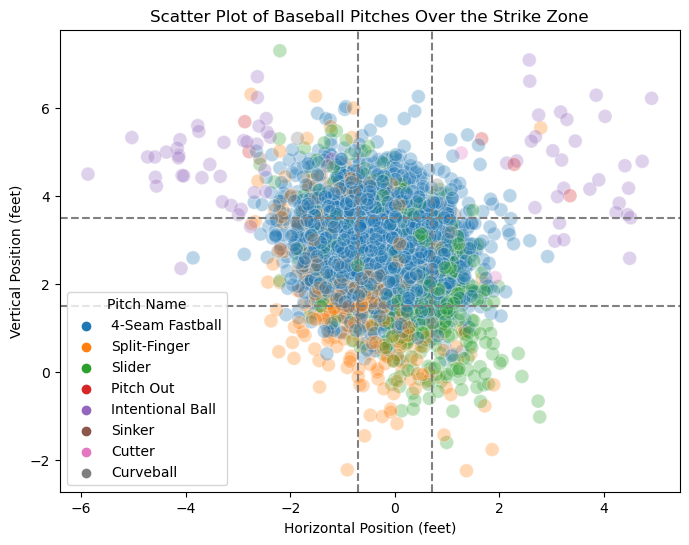

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(8, 6))

# Create scatter plot
sns.scatterplot(data=pitch_name_locations, x="plate_x", y="plate_z", hue="pitch_name", s=100, alpha=0.3)

# Customize the axes
plt.axhline(y=1.5, color='gray', linestyle='--')  # lower bound of strike zone
plt.axhline(y=3.5, color='gray', linestyle='--')  # upper bound of strike zone
plt.axvline(x=-0.71, color='gray', linestyle='--')  # left bound of strike zone (17 inches / 2)
plt.axvline(x=0.71, color='gray', linestyle='--')  # right bound of strike zone (17 inches / 2)
# plt.xlim(-2, 2)  # Adjust as needed based on the data
# plt.ylim(0, 6)  # Adjust as needed based on the data

# Add labels and legend
plt.title("Scatter Plot of Baseball Pitches Over the Strike Zone")
plt.xlabel("Horizontal Position (feet)")
plt.ylabel("Vertical Position (feet)")
plt.legend(title="Pitch Name")

# Show plot
plt.show()


In [30]:
# get batter data
carroll_id = mlb_metrics.player_id("Carroll", "Corbin")
carroll_general_stats = mlb_metrics.player_general_metrics(carroll_id, timeline_type="career")
carroll_timeline = mlb_metrics.parse_career_timeline(carroll_general_stats)

carroll_specific_stats = mlb_metrics.player_specific_metrics(
    carroll_id,
    metric_type="batting",
    start_dt=carroll_timeline[0],
    end_dt=carroll_timeline[1],
)
carroll_plate_crossing_metrics = mlb_metrics.plate_crossing_metrics(carroll_specific_stats)
description_locations = carroll_plate_crossing_metrics[['description', 'plate_x', 'plate_z']]

description_locations

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FC,2023-11-01,90.3,-2.44,5.50,"Carroll, Corbin",682998,543135,field_out,hit_into_play,...,0,0,0,0,0,Standard,Standard,200.0,-0.029,-0.238
1,FF,2023-11-01,94.9,-2.55,5.28,"Carroll, Corbin",682998,543135,single,hit_into_play,...,0,0,0,0,0,Strategic,Standard,236.0,0.040,0.388
2,FF,2023-11-01,95.6,-0.66,6.25,"Carroll, Corbin",682998,622250,field_out,hit_into_play,...,5,5,0,0,5,Standard,Standard,208.0,-0.002,-0.194
3,CU,2023-11-01,83.9,-1.20,6.10,"Carroll, Corbin",682998,622250,NaN,ball,...,5,5,0,0,5,Standard,Standard,28.0,0.000,0.025
4,FF,2023-11-01,96.0,-2.56,5.32,"Carroll, Corbin",682998,543135,walk,ball,...,0,0,0,0,0,Infield shade,Standard,230.0,0.036,0.155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344,SI,2022-08-29,92.1,2.28,5.85,"Carroll, Corbin",682998,624133,NaN,called_strike,...,4,4,0,0,4,Standard,Standard,135.0,0.000,-0.034
3345,SI,2022-08-29,94.1,2.11,6.51,"Carroll, Corbin",682998,543272,field_out,hit_into_play,...,7,7,13,13,7,Standard,Standard,145.0,0.000,-0.114
3346,ST,2022-08-29,80.2,2.22,6.33,"Carroll, Corbin",682998,543272,NaN,ball,...,7,7,13,13,7,Standard,Standard,310.0,0.000,0.021
3347,SI,2022-08-29,94.5,2.11,6.43,"Carroll, Corbin",682998,543272,NaN,foul,...,7,7,13,13,7,Standard,Standard,148.0,0.000,-0.021


In [42]:
carroll_plate_crossing_metrics.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [38]:
carroll_plate_crossing_metrics.description.unique()

array(['hit_into_play', 'ball', 'foul', 'swinging_strike',
       'called_strike', 'blocked_ball', 'foul_tip', 'pitchout',
       'hit_by_pitch', 'swinging_strike_blocked', 'foul_bunt',
       'missed_bunt'], dtype=object)

In [40]:

print(description_locations)

        description  plate_x  plate_z
0     hit_into_play     0.31     2.82
1     hit_into_play    -0.61     2.21
2     hit_into_play    -0.17     3.64
3              ball     0.94     0.73
4              ball    -1.34     3.03
...             ...      ...      ...
3344  called_strike     0.59     1.99
3345  hit_into_play     0.39     2.42
3346           ball     1.38     1.85
3347           foul     0.72     1.75
3348           ball    -1.44     0.41

[3279 rows x 3 columns]


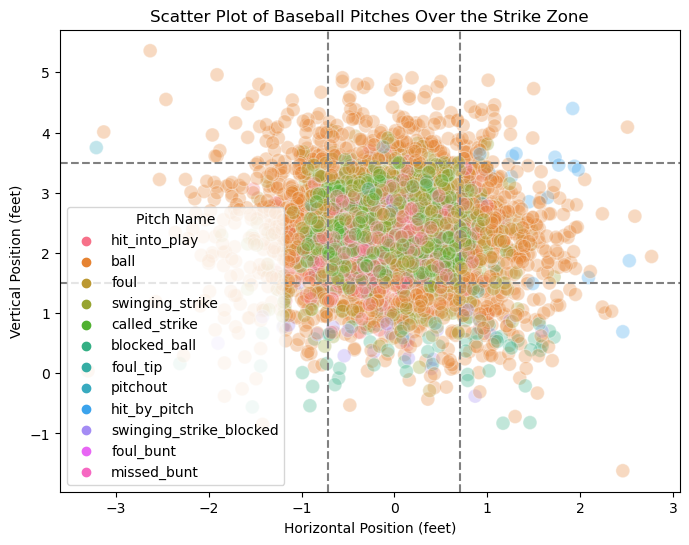

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(8, 6))

# Create scatter plot
sns.scatterplot(data=description_locations, x="plate_x", y="plate_z", hue="description", s=100, alpha=0.3)

# Customize the axes
plt.axhline(y=1.5, color='gray', linestyle='--')  # lower bound of strike zone
plt.axhline(y=3.5, color='gray', linestyle='--')  # upper bound of strike zone
plt.axvline(x=-0.71, color='gray', linestyle='--')  # left bound of strike zone (17 inches / 2)
plt.axvline(x=0.71, color='gray', linestyle='--')  # right bound of strike zone (17 inches / 2)
# plt.xlim(-2, 2)  # Adjust as needed based on the data
# plt.ylim(0, 6)  # Adjust as needed based on the data

# Add labels and legend
plt.title("Scatter Plot of Baseball Pitches Over the Strike Zone")
plt.xlabel("Horizontal Position (feet)")
plt.ylabel("Vertical Position (feet)")
plt.legend(title="Pitch Name")

# Show plot
plt.show()

In [43]:
description_locations.description.value_counts()

description
ball                       1153
hit_into_play               598
called_strike               559
foul                        552
swinging_strike             277
blocked_ball                 55
foul_tip                     31
swinging_strike_blocked      27
hit_by_pitch                 17
foul_bunt                     7
missed_bunt                   2
pitchout                      1
Name: count, dtype: int64